# DSC Machine Learning Task

According to the problem statement we are given a dataset in which we have the marks of the dtudents in two test and whether they're selected for college admission. In this notebook we try to perform some exploratory data analysis and we will later apply three algorithms to get predictions on test dataset and to compare test loss in each case. 

We start by importing some necessary libraries to perform exploratory data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_dataframe = pd.read_csv('datasets/admission_train.csv')
test_dataframe = pd.read_csv('datasets/admission_test.csv')

train_dataframe.head()

,Score 1,Score 2,Student admitted or not
0,30.05882,49.59297,0
1,50.45816,75.80986,1
2,32.57720,95.59855,0
3,58.84096,75.85845,1
4,94.09433,77.15911,1


### Exploratory data analysis

We start the exploratory data analysis by doing operations in our training dataframe and doing the same set of operations in our test dataframe. These operations may include naming of column, Feature scaling, Data cleaning, finding and filling of NaN/None values(imputation). Ploting charts to have idea of data points, etc. 

EDA is important because it can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

In [3]:
# Let's start by renaming the columns. 
train_dataframe.rename({'Score 1': 'score1', 'Score 2': 'score2', 'Student admitted or not': 'selected'}, axis = 1, inplace = True)
test_dataframe.rename({'Score 1': 'score1', 'Score 2': 'score2', 'Student admitted or not': 'selected'}, axis = 1, inplace = True)

train_dataframe.head()

,score1,score2,selected
0,30.05882,49.59297,0
1,50.45816,75.80986,1
2,32.57720,95.59855,0
3,58.84096,75.85845,1
4,94.09433,77.15911,1


In [4]:
print('The training dataset has a record of {} students'.format(train_dataframe.shape[0]))
print('The test dataset has a record of {} students'.format(test_dataframe.shape[0]))

The training dataset has a record of 75 students
The test dataset has a record of 25 students


In [5]:
# Let's look for the number of Null entries in different columns of the train and test dataframe.
print('Train\n', train_dataframe.isnull().sum(), '\n')
print('Test\n', test_dataframe.isnull().sum())

Train
 score1      0
score2      0
selected    0
dtype: int64 

Test
 score1      0
score2      0
selected    0
dtype: int64


We have a clean dataset.
Often a times we use plots and graphs to in order to decide which kind of learning is to be performed. What algorithm should be choosen in order to train our model.
Let's plot the feature vector.

In [6]:
selected = train_dataframe[train_dataframe['selected']==1]
not_selected = train_dataframe[train_dataframe['selected']==0]

selected.head()

,score1,score2,selected
1,50.45816,75.80986,1
3,58.84096,75.85845,1
4,94.09433,77.15911,1
5,71.79646,78.45356,1
6,79.03274,75.34438,1


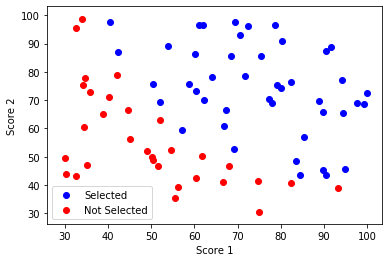

In [7]:
# Plot the score of test 1 and test 2. Selected in blue and not selected in red to see if there's any pattern.
plt.scatter(selected['score1'].tolist(), selected['score2'].tolist(),  c = 'b')
plt.scatter(not_selected['score1'].tolist(), not_selected['score2'].tolist(), c = 'r')
plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.legend(['Selected', 'Not Selected'])

##### Inferences
- Since this is a binary classification, from the plot we see a decision boundry which can help us to classify a new data record as selected or not selected.
- We are going to use supervised learning algorithm since we already have the labels(outputs). 

There are various algorithms which we can use to make a binary classification model. Some of which are:
- Logistic Regression
- Decision Trees
- SVM (Support Vector Machine)
- Neural Networks

### Logistic Regression

In [8]:
# We implement the logistic regression using sklearn.
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric

In [9]:
# Split the dataframe into independent variable which is 'X' and dependent variable which is 'Y'.
X_train = np.asarray(train_dataframe[['score1', 'score2']])
X_test = np.asarray(test_dataframe[['score1', 'score2']])

y_train = np.asarray(train_dataframe['selected'])
y_test = np.asarray(test_dataframe['selected'])

print(X_train[:5], '\n')
print(y_train[:5])

[[30.05882 49.59297]
 [50.45816 75.80986]
 [32.5772  95.59855]
 [58.84096 75.85845]
 [94.09433 77.15911]] 

[0 1 0 1 1]


In [10]:
# Using the StandardScaler function in scikit-learn we normalize the independent variable X.
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

X_train[:5]

array([[-1.72472458, -0.91512694],
       [-0.70152994,  0.4950881 ],
       [-1.59840711,  1.55952818],
       [-0.2810636 ,  0.49770178],
       [ 1.48718277,  0.5676647 ]])

In [11]:
# Modelling 
# Parameter 'C' for regularization
# 'liblinear' optimizer, because we have a small dataset.

logistic_model = LogisticRegression(C = 0.1, solver = 'liblinear')
logistic_model.fit(X_train, y_train)
print(logistic_model)

LogisticRegression(C=0.1, solver='liblinear')


Now that the training of the model is done, we can start with predictions, evaluation and plotting of model.
We will be using 3 different evalution metrics provided by sklearn which are _classification report_ , _confusion matrix_ and _log loss_. 

In [12]:
# Predictions

y_predict = logistic_model.predict(X_test)
y_predict_prob = logistic_model.predict_proba(X_test)

print('First 5 predictions: ', y_predict[:5])
print('Actual output: ', y_test[:5], '\n')
print('Probabilities: ', y_predict_prob[:5])

First 5 predictions:  [0 0 0 1 1]
Actual output:  [0 1 0 1 1] 

Probabilities:  [[0.69281119 0.30718881]
 [0.61844119 0.38155881]
 [0.67897828 0.32102172]
 [0.45951706 0.54048294]
 [0.49615783 0.50384217]]


In [13]:
# Model evaluation
"""
Classification report provides a summary of out model. It  includes precision score, F1 score, recall and support metric. 
Using a classification report we can easily understand the accuracy and performance of a model. 

Precision - measure of the accuracy provided that a class label has been predicted.

Recall -  true positive rate. recall = TP/(TP+FN).

F1Score - The F1 score is the harmonic average of the precision and recall. 1 - perfect precision and record, 0 - bad model.
"""
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.87      0.81      0.84        16

    accuracy                           0.80        25
   macro avg       0.78      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



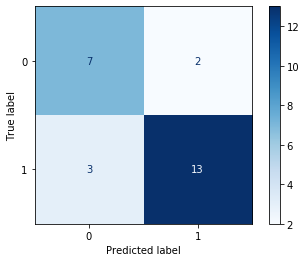

In [14]:
"""
Confusion matrix allows us to see the model's ability to correctly predict or separate the classes. In our case (binary 
classification), we can easily interpret the count of true positives, false positives, true negatives, and false negatives 
using the confusion matrix.
"""
heatmap = plot_confusion_matrix(logistic_model, X_test, y_test, cmap='Blues', values_format = '.3g')

In [15]:
heatmap.confusion_matrix

array([[ 7,  2],
       [ 3, 13]], dtype=int64)

In [16]:
"""
The output of a logitic model is the probability of a student getting selected. The value of probability is between 0 and 1. 
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value 
between 0 and 1. The lower the log loss value higher the accuracy of our model. 
"""
print(log_loss(y_test, y_predict).round(2))

6.91


_______________________________________________________________________________________________________________________________